In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [2]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [3]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


Выделяем молочную продукцию

In [4]:
df_checks_milk = df_checks_with_cat[df_checks_with_cat['name_gr'] == 'Молочная Продукция' ]

In [5]:
df_checks_milk_sub_pivot = df_checks_milk.pivot_table(columns=['name_gr2'],index=['good_or_bad_y'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()

In [6]:
df_checks_milk_sub_pivot.set_index(df_checks_milk_sub_pivot['good_or_bad_y'],inplace=True)
del df_checks_milk_sub_pivot['good_or_bad_y']

In [7]:
df_checks_milk_sub_pivot_t = df_checks_milk_sub_pivot.transpose()

In [8]:
df_checks_milk_sub_pivot_t[-1] = 100* df_checks_milk_sub_pivot_t[-1].div(df_checks_milk_sub_pivot_t[-1].sum())
df_checks_milk_sub_pivot_t[1] = 100* df_checks_milk_sub_pivot_t[1].div(df_checks_milk_sub_pivot_t[1].sum())
df_checks_milk_sub_pivot_t[0] = 100* df_checks_milk_sub_pivot_t[0].div(df_checks_milk_sub_pivot_t[0].sum())

<AxesSubplot:ylabel='None,name_gr2'>

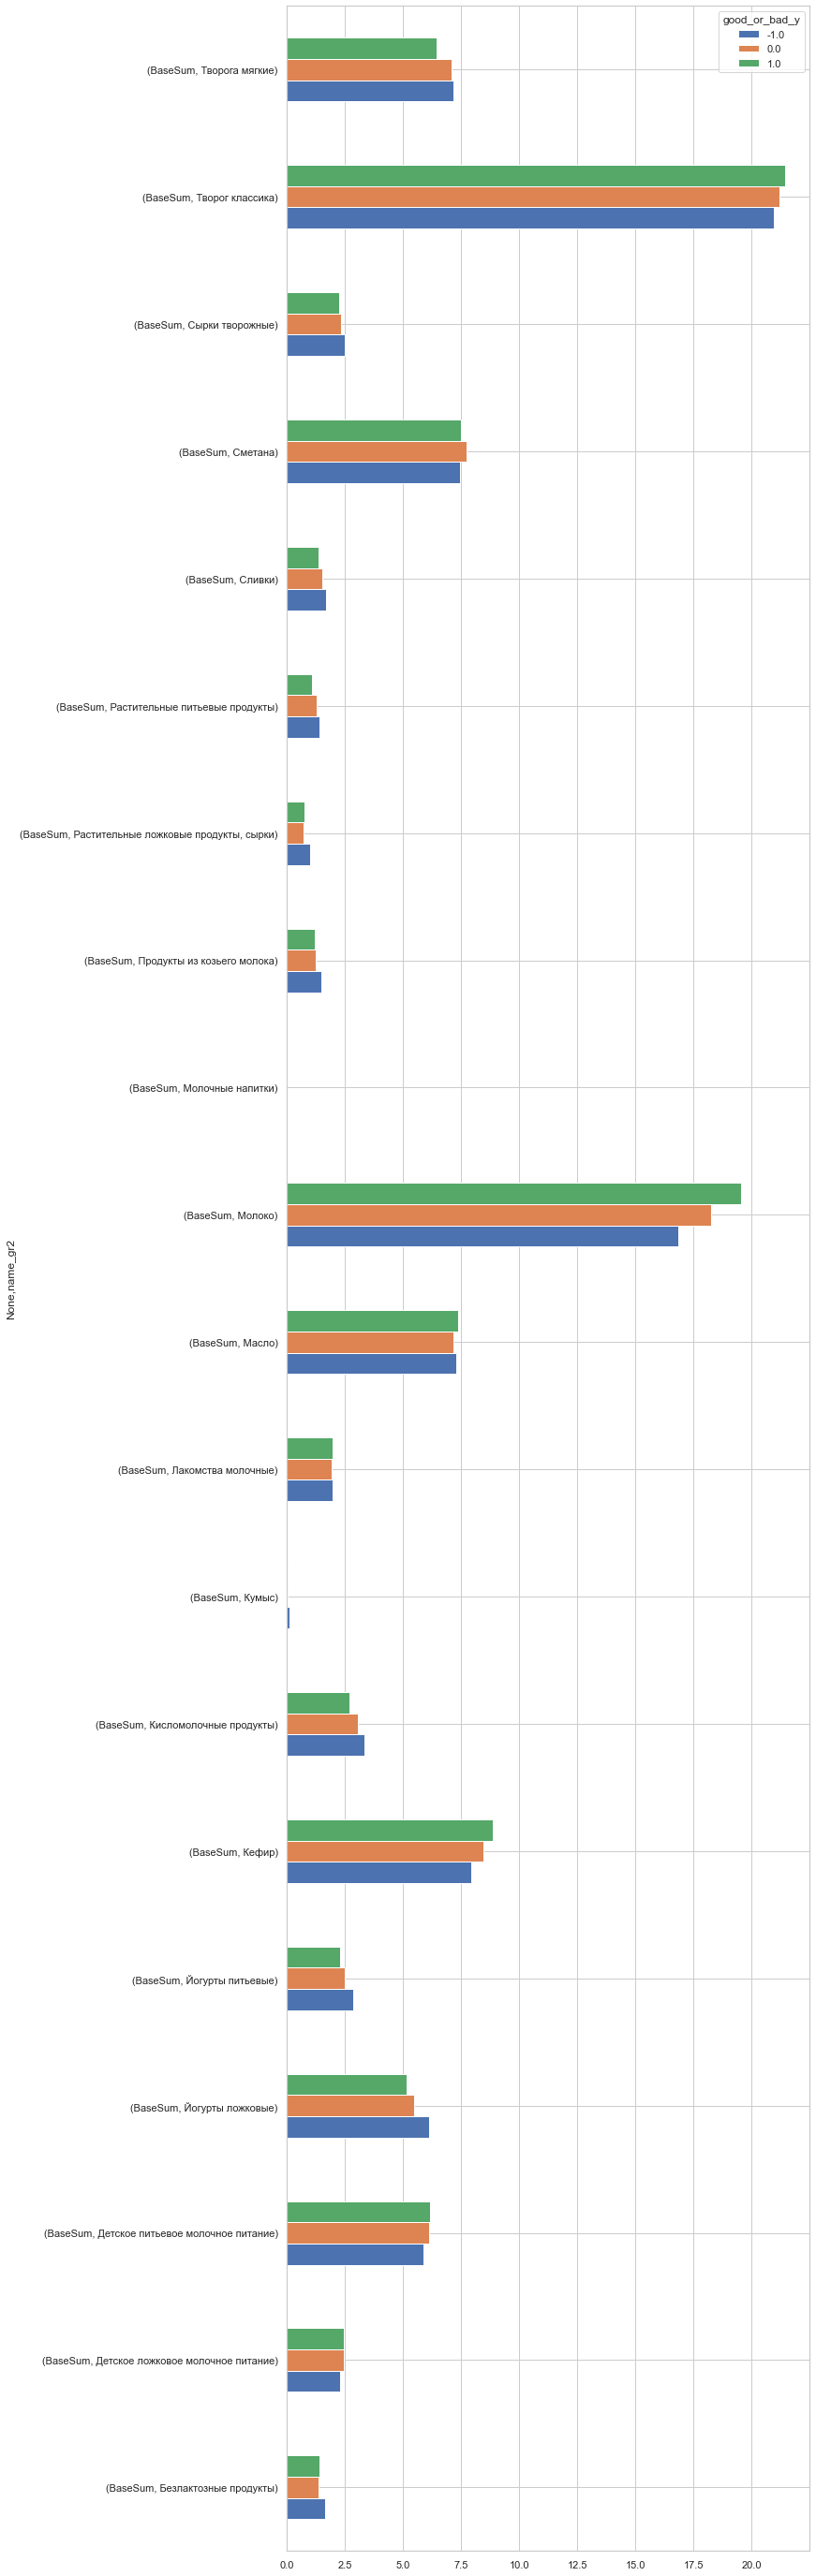

In [9]:
df_checks_milk_sub_pivot_t.plot(kind="barh",figsize=(10,50))

In [13]:
df_checks_moloko = df_checks_with_cat[df_checks_with_cat['name_gr2'] == 'Молоко' ]

In [12]:
all_sales_bad = df_checks_with_cat[df_checks_with_cat['good_or_bad_y'] == -1 ]['BaseSum'].sum()
all_sales_average = df_checks_with_cat[df_checks_with_cat['good_or_bad_y'] == 0 ]['BaseSum'].sum()
all_sales_good = df_checks_with_cat[df_checks_with_cat['good_or_bad_y'] == 1 ]['BaseSum'].sum()

In [20]:
df_checks_moloko_by_days = df_checks_moloko.pivot_table(columns=['hour'],index=['good_or_bad_y'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()
df_checks_moloko_by_days.set_index(df_checks_moloko_by_days['good_or_bad_y'],inplace=True)
del df_checks_moloko_by_days['good_or_bad_y']

In [22]:
df_checks_moloko_by_days_t = df_checks_moloko_by_days.transpose()

In [25]:
df_checks_moloko_by_days_t[-1] = 1000*df_checks_moloko_by_days_t[-1] /all_sales_bad
df_checks_moloko_by_days_t[0] = 1000*df_checks_moloko_by_days_t[0] /all_sales_average
df_checks_moloko_by_days_t[1] = 1000*df_checks_moloko_by_days_t[1] /all_sales_good

<AxesSubplot:ylabel='None,hour'>

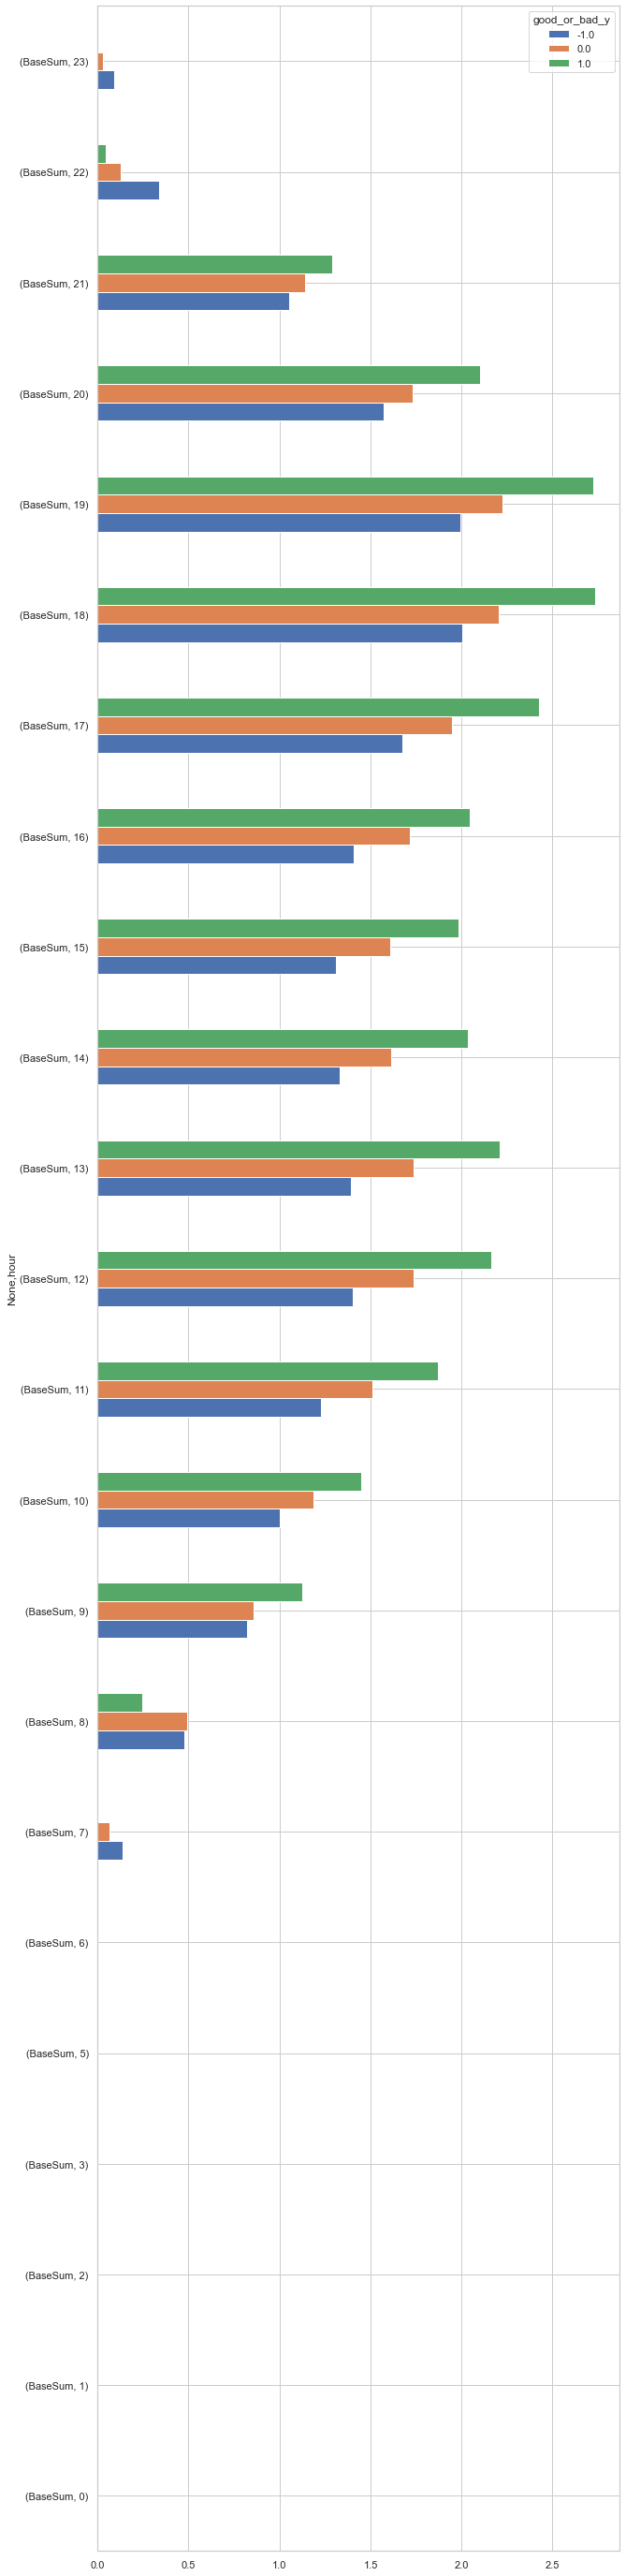

In [26]:
df_checks_moloko_by_days_t.plot(kind="barh",figsize=(10,50))